# Ước tính cỡ mẫu cho bài toán so sánh không thua kém giữa 2 tỉ lệ

**BS. Lê Ngọc Khả Nhi**

Ở đây ta có một bài toán so sánh 2 tỉ lệ. Kết cục của nghiên cứu (thí dụ : hiệu quả của một can thiệp điều trị) được khảo sát như một tỉ lệ p, giá trị p nằm trong khoảng 0,1.

Giả định thí nghiệm được thực hiện trên 2 phân nhóm A, B (thí dụ nhóm can thiệp và đối chứng). Chúng ta ghi nhận được giá trị pA, pB và nhận thấy pA > pB ; Ta muốn kiểm nghiệm liệu sự khác biệt pA – pB thực sự có ý nghĩa (pA không thua kém/thực sự cao hơn pB), ý tưởng là sự khác biệt pA-pB chỉ được công nhận là đáng kể khi nó vượt qua một ngưỡng/biên độ $\delta$ ; thí dụ 10%.

Giả thuyết vô hiệu : sự khác biệt giữa pA và pB chưa vượt quá ngưỡng delta

$$H_0:p_A-p_B\le\delta$$

Giả thuyết đối nghịch : khác biệt giữa pA và pB vượt qua ngưỡng delta

$$H_1:p_A-p_B>\delta$$

Cỡ mẫu của phân nhóm A (nA) và B(nB) được ước tính bởi công thức :

$$n_A=\kappa n_B \;\text{ và }\;
		n_B=\left(\frac{p_A(1-p_A)}{\kappa}+p_B(1-p_B)\right)
			\left(\frac{z_{1-\alpha}+z_{1-\beta}}{p_A-p_B-\delta}\right)^2$$


$\kappa$ là tỉ lệ giữa 2 phân nhóm, $\kappa < 1$ khi nhóm A ít hơn nhóm B và ngược lại. Như vậy, tham số $\kappa$ cho phép thiết kế thí nghiệm với 2 mẫu bất cân xứng về tỉ lệ, thí dụ rất dễ để lập nên nhóm đối chứng, nhưng có trở ngại trong việc áp dụng can thiệp trên số lượng lớn.

$$\kappa=\frac{n_A}{n_B}$$

Với:
 
$\alpha$: ngưỡng ý nghĩa thống kê, hay xác suất phạm sai lầm loại 1 (phủ nhận sai một giả thuyết vô hiệu khi mà nó đúng). $\alpha$ càng thấp thì càng yêu cầu cỡ mẫu lớn, và ngược lại. Theo quy ước, người ta thường chấp nhận $\alpha$ = 0.05

$\beta$: là xác suất phạm sai lầm loại II (âm tính giả). 

Power = 1 - $\beta$; Lực thống kê, là xác suất phủ nhận chính xác một giả thuyết vô hiệu, nếu quả thực giả thuyết này sai. Nói cách khác – khả năng phát hiện ra một hiệu ứng/khác biệt nếu nó thực sự tồn tại.

Giá trị kì vọng power càng cao, thì cỡ mẫu càng phải lớn theo và ngược lại. Theo quy ước, người ta thường chấp nhận power = 0.8 (tương ứng $\beta$ = 0.2).

$Z_{p}$ là bách phân vị thứ p của phân phối chuẩn hóa (standard normal)


với $\delta$ là ngưỡng cho tiêu chí không thua kém (chú ý : ở đây pA > pB, nên $\delta$ có giá trị âm, thí dụ = -0.1)

Ghi chú : delta = 0 tương ứng với bài toán đơn giản nhằm kiểm nghiệm liệu pA có cao hơn pB hay không.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
from typing import Tuple

## Hàm ước tính cỡ mẫu

In [2]:
## Hàm ước tính cỡ mẫu

def est_sample_size(pA: float, 
                    pB: float, 
                    k: float, 
                    delta: float,
                    alpha: float = 0.05, 
                    beta: float = 0.2,)-> Tuple[float]:
        
        """k: matching ratio
           delta: testing margin
           pA: proportion in grp A
           pB: proportion in grp B
           alpha: Type I error
           beta: Type II error
        """

        nB=(pA*(1-pA)/k + pB*(1-pB))*\
        ((norm.ppf(1-alpha)+norm.ppf(1-beta))/(pA-pB-delta))**2
                    
        nA = k*nB

        return nA, nB, nA+nB

## Hàm mô phỏng kết quả khi tham số dao động

In [16]:
## Simulation plot

def plot_sim(pA: float,
                    pB: float, 
                    k: float, 
                    delta: float,
                    alpha: float = 0.05, 
                    beta: float = 0.2,
                    marg: float = 0.2):
    
    s_pA = np.linspace(max(0.01,pA-marg),min(1.,pA+marg),num = 50)
    s_pB = np.linspace(max(0.01,pB-marg),min(1.,pB+marg),num = 50)
    
    sd = np.linspace(min(-marg,delta - marg), 0.0), num = 50)
    sk = np.linspace(0.3, 1.5, num=50)
    
    plt.rc('font', size=13) 
    fig, axs = plt.subplots(2,2, figsize=(12,12))
    
    fig.suptitle('Kết quả mô phỏng')
    
    axs[0, 0].set_ylabel('Cỡ mẫu nhóm A')
    axs[0, 0].set_xlabel('Tỉ lệ pA')
    axs[0, 1].set_ylabel('Cỡ mẫu nhóm B')
    axs[0, 1].set_xlabel('Tỉ lệ pB')
    axs[1, 0].set_ylabel('Cỡ mẫu A+B')
    axs[1, 0].set_xlabel('Biên độ sai biệt $\delta$')
    axs[1, 1].set_ylabel('Cỡ mẫu A+B')
    axs[1, 1].set_xlabel('Tỉ lệ nA/nB')
    
    nA, nB, tot = est_sample_size(pA = pA, pB = pB, k=k, \
                                 delta = delta, alpha = alpha, \
                                 beta = beta)
    
    for b in [0.05,0.1,0.2,0.25,0.3,]:
        
        sim_1 = [est_sample_size(pA = x, pB = pB, k=k, \
                                 delta = delta, alpha = alpha, \
                                 beta = b)[0] \
                 for x in s_pA]
        
        axs[0, 0].plot(s_pA, sim_1, label = f"power: {1-b}")
        
        sim_2 = [est_sample_size(pA = pA, pB = x, k=k, \
                                 delta = delta, alpha = alpha, \
                                 beta = b)[1] \
                 for x in s_pB]
        
        axs[0, 1].plot(s_pB, sim_2, label = f"power: {1-b}")
        
        sim_3 = [est_sample_size(pA = pA, pB = pB, k=k, \
                                 delta = x, alpha = alpha, \
                                 beta = b)[2] \
                 for x in sd]
        
        axs[1, 0].plot(sd, sim_3, label = f"power: {1-b}")
        
        sim_4 = [est_sample_size(pA = pA, pB = pB, k=x, \
                                 delta = delta, alpha = alpha, \
                                 beta = b)[2] \
                 for x in sk]
        
        axs[1, 1].plot(sk, sim_4, label = f"power: {1-b}")
        
        axs[0, 0].legend()
    
    plt.tight_layout()
    plt.show()

SyntaxError: unmatched ')' (<ipython-input-16-ca5160291588>, line 14)

## Tình huống minh họa

Một chị bác sĩ dự định tiến hành một nghiên cứu khảo sát hiệu quả của kỹ thuật kích thích kép (Dual trigger) với chủ vận GnRH trên phụ nữ hiếm muộn do suy giảm dự trữ buồng trứng, so với phương pháp kích thích buồng trứng bằng hCG thông thường. Kết cục được so sánh bao gồm tỉ lệ trứng thụ tinh và tỉ lệ thai kì diễn tiến.
 
Mục tiêu đặt ra : chứng minh phương pháp kích thích kép (Dual trigger) có hiệu quả không thua kém (ưu thế hơn) so với phương pháp thông thường.

Thí nghiệm RCT được thiết kế gồm 2 phân nhóm: nhóm A áp dụng can thiệp Dual trigger, nhóm B có vai trò đối chứng, áp dụng quy trình thông thường.

Hiệu quả can thiệp được ước lượng bằng sự khác biệt pA – pB, với pA và pB lần lượt là tỉ lệ trứng thụ tinh thành công (hoặc tỉ lệ thai kì diễn tiến) ở phân nhóm A và B.

Chị bác sĩ này tham khảo y văn và lấy được thông tin effect size từ nghiên cứu của Lin và cs ở Đài Loan (2019), 

Cho tỉ lệ trứng thụ tinh thành công : pA = 0.731 và pB = 0.586; 

Giả định nhóm can thiệp có cỡ mẫu tương đương nhóm đối chứng (k=1)

Áp dụng est_sample_size cho các tham số trên, ta có;

In [6]:
est_sample_size(pA = 0.731,
                pB = 0.586,
                k = 1.,
                delta = -0.05,
                alpha = 0.05,
                beta = 0.2
               )

(71.41735664073788, 71.41735664073788, 142.83471328147576)

Kết quả: cần ít nhất 142 bệnh nhân

Cho tỉ lệ thai kì diễn tiến : pA = 0.33 và pB = 0.207

Giá trị kì vọng của biên độ delta = 5%

In [7]:
est_sample_size(pA = 0.33,
                pB = 0.207,
                k = 1.,
                delta = -0.05,
                alpha = 0.05,
                beta = 0.2
               )

(79.58289138270058, 79.58289138270058, 159.16578276540116)

Kết quả: cần ít nhất 160 bệnh nhân

Thông thường, ta cần phải mô phỏng tình huống các giá trị tham số nói trên dao động trong một khoảng cho trước, thí dụ cỡ mẫu sẽ thay đổi ra sao nếu tỉ lệ thụ tinh thành công ở nhóm can thiệp dao động từ 60 đến 80 ? Tỉ lệ thành công ở nhóm đối chứng dao động từ 45% đến 70 % ?, Nếu ta muốn nhóm can thiệp ít bệnh nhân hơn so với nhóm chứng ?

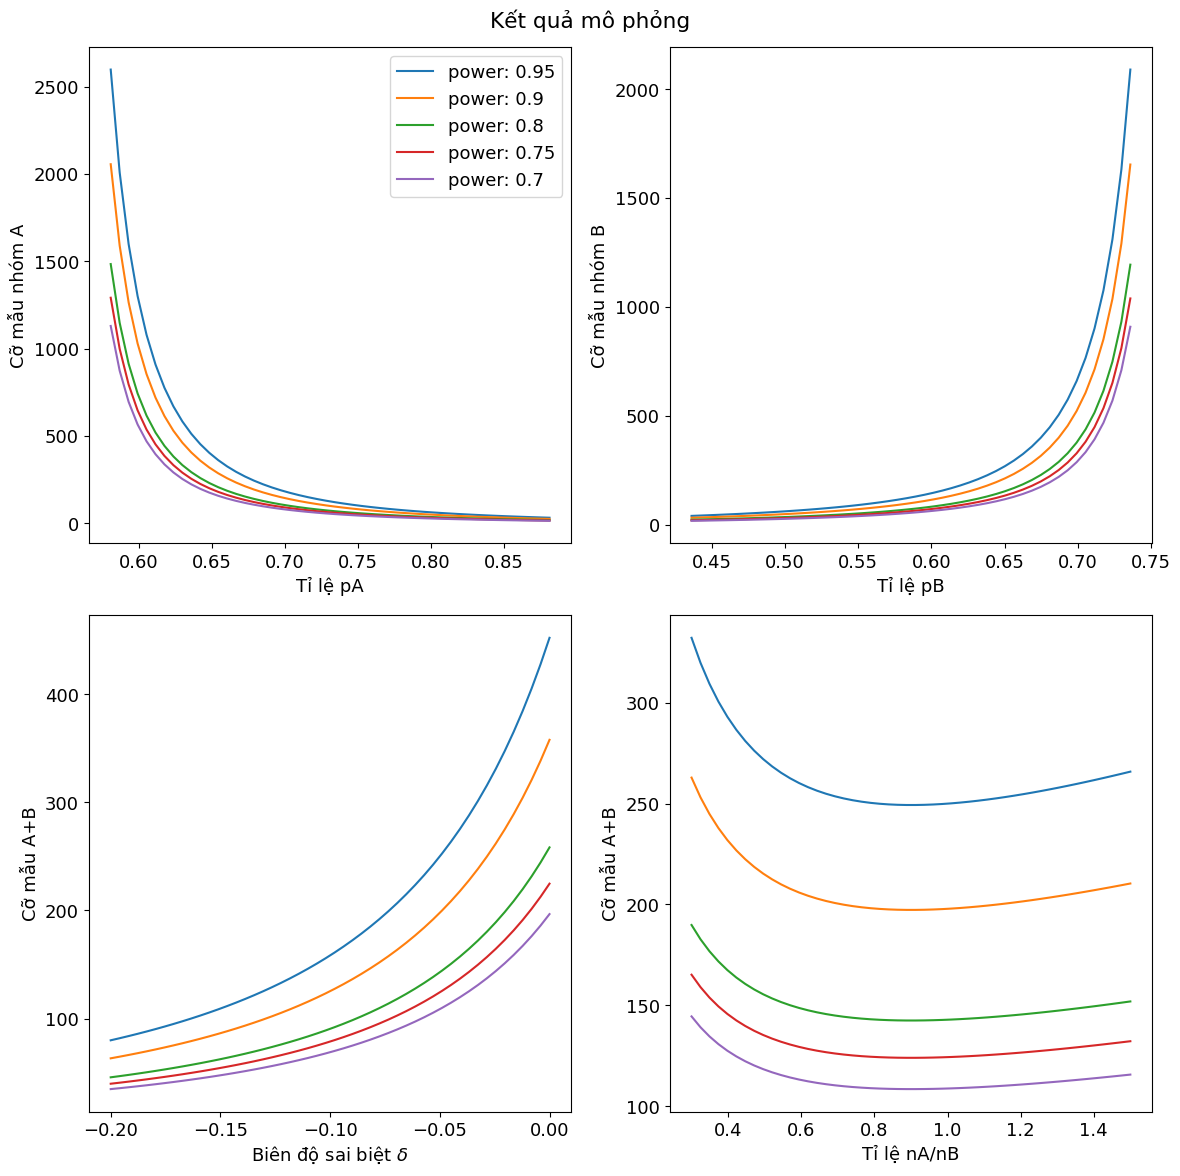

In [17]:
plot_sim(pA = 0.731,
                pB = 0.586,
                k = 1.,
                delta = -0.05,
                alpha = 0.05,
                beta = 0.2,
                marg = 0.15
               )